In [9]:
import cv2                          #이미지 처리
import matplotlib.pyplot as plt     #시각화
import tensorflow_datasets as tfds  #데이터 가져오는 곳
import tensorflow as tf             #딥 러닝모델 만들기

In [2]:
data_train, ds_info = tfds.load('cats_vs_dogs',split = [tfds.Split.TRAIN], with_info = True)
"""
'cats_vs_dogs'라는 데이터를 가져오고
테스트 셋은 없고 트레인만 가져옴
info로 데이터에 대한 정보도 같이 가져옴
"""

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete1S07VE/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmptod4oey9tfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

데이터 갯수 출처등을 할 수 있다.

In [4]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
#데이터를 넘파이 형태로 30개 가져온다.

In [5]:
len(images)

30

(-0.5, 349.5, 261.5, -0.5)

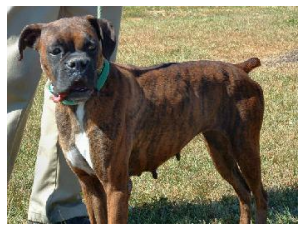

In [6]:
plt.imshow(images[0])
plt.axis('off')

(-0.5, 499.5, 492.5, -0.5)

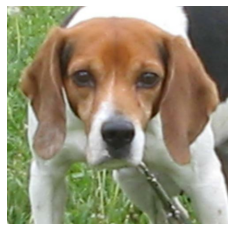

In [7]:
plt.imshow(images[2])
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

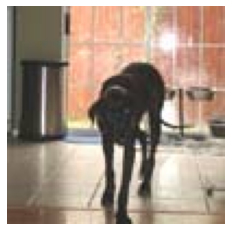

In [8]:
plt.imshow(images[5])
plt.axis('off')

## 이제 모델을 만들어 본다

In [11]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights = 'imagenet', input_shape =(224, 224, 3))

102967424/102967424 [==============================] - 0s 0us/step


weights라는 파라미터에  imagenet을 사용한다.
imagenet은 이미 학습된 모델이다.

input_shapt로 입력하는 그림의 사이즈 입력.

In [12]:
resnet50_pre.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### 이제 구분하는 모델 만들기

In [13]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [16]:
def pred_img(img):
  plt.imshow(img)#입력된 이미지를 우선 출력
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224, 224))#크기를 224, 224 에 맞춘다
  pred = resnet50_pre.predict(img_resized.reshape([1, 224, 224, 3]))#예측하기 위해 배치로 만들어줌. 배치?
  decoded_pred = decode_predictions(pred)

  for i, instance in enumerate(decoded_pred[0]):
    print('{}위 : {} ({:.2f}%)'.format(i+1, instance[1], instance[2] * 100))

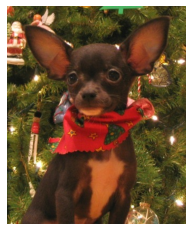

35363/35363 [==============================] - 0s 0us/step
2위 : Chihuahua (90.09%)
3위 : miniature_pinscher (4.65%)
4위 : French_bulldog (2.58%)
5위 : Boston_bull (0.80%)
6위 : boxer (0.45%)


In [15]:
pred_img(images[1])

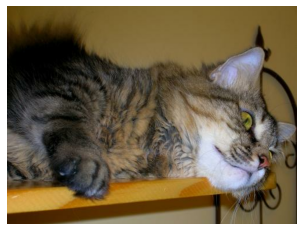

1/1 [==============================] - 0s 195ms/step
1위 : tabby (43.60%)
2위 : lynx (16.35%)
3위 : tiger_cat (14.93%)
4위 : Egyptian_cat (6.43%)
5위 : Persian_cat (3.99%)


In [17]:
pred_img(images[3])

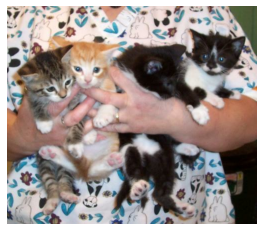

1/1 [==============================] - 0s 153ms/step
1위 : schipperke (13.89%)
2위 : miniature_pinscher (13.83%)
3위 : Bernese_mountain_dog (4.91%)
4위 : hen-of-the-woods (3.39%)
5위 : kelpie (2.53%)


In [18]:
pred_img(images[23])